URL for this is: https://www.kaggle.com/hugodarwood/epirecipes

In [66]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import ensemble

In [67]:
# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format
pd.options.display.max_colwidth = 500
pd.options.display.max_rows = 500

In [68]:
path="../../../../Datafiles/"
file = 'epi_r.csv'
raw_data = pd.read_csv(path + file)
print("there are {} entries in the data file {}".format(len(raw_data), file))

# this is the original URL from which derived the data
#raw_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/epi_r.csv')

there are 20052 entries in the data file epi_r.csv


In [69]:
raw_data.head(5)

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.000,30.000,7.000,559.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.000,18.000,23.000,1439.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,Potato and Fennel Soup Hodge,3.750,165.000,6.000,7.000,165.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,Mahi-Mahi in Tomato Olive Sauce,5.000,nan,nan,nan,nan,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,Spinach Noodle Casserole,3.125,547.000,20.000,32.000,452.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In the next cell, we are creating the label rating_binary, a binary rating, called rating_binary, which we will classify as anything over a rating of 4.0, becomes a 1, and everything else, is a 0.

For the other major features, we are removing all NaN columns for these top features, as many have null vales, or not a number, NaN.

We will be predicting from the top 30 columns, along with:
* Calories
* Sodium
* Fat
* Protein

In [70]:
# Count nulls 
print(null_count[null_count>0])
raw_data['rating_binary'] = np.where(raw_data.rating >= 4.0, 1, 0) # make either popular or not

# raw_data['rating'].isnull().sum()
print("the number of rows in raw_data before the drop {}".format(len(raw_data)))
raw_data['sodium'].isnull().sum()
raw_data = raw_data.dropna(how='any')
print("the number of rows in raw_data after the drop {}".format(len(raw_data)))

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64
the number of rows in raw_data before the drop 20052
the number of rows in raw_data after the drop 15864


In [71]:
from sklearn.svm import SVR
svr = SVR()
# columns_not_deleted = ['calories', 'protein', 'fat', 'sodium']
X = raw_data.drop(['rating', 'rating_binary','title'], 1).sample(frac=0.3, replace=True, random_state=1)
Y = raw_data.rating_binary.sample(frac=0.3, replace=True, random_state=1)
svr.fit(X,Y)

/Users/lou/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

Here is a plot of using the cleaned up dataset, with all of the columns.  

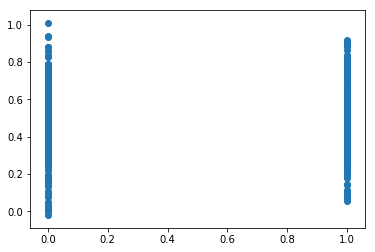

In [97]:
plt.scatter(Y, svr.predict(X));

Here is a score using the complete dataset, with all features.  We can beat this.

In [73]:
svr.score(X,Y)

0.6391753483295302

In [74]:
# Here we are using Random Forest method to determine the top 30 features.

rfc = ensemble.RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=0)
## Fit the model on your training data.
rfc.fit(X_train, y_train) 
## And score it on your testing data.
rfc.score(X_test, y_test)

/Users/lou/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.645483193277311

Here we are determining the top 30 features from the Random Forest classification.

In [75]:
classifier = rfc
feature_importances = pd.DataFrame(classifier.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

In [76]:
feature_importances.head(40)*100;
top_30_columns = feature_importances.index[0:30] # We only want the top 30 features
print("the top 30 features are {}".format(top_30_columns))

the top 30 features are Index(['calories', 'sodium', 'fat', 'protein', 'bon appétit', 'winter',
       'quick & easy', 'gourmet', 'fall', 'bake', 'summer', 'milk/cream',
       'spring', 'vegetarian', 'tree nut free', 'fruit', 'egg', 'peanut free',
       'vegetable', 'soy free', 'sauté', 'garlic', 'tomato', 'pasta', 'orange',
       'dairy', 'roast', 'sauce', 'cheese', 'kid-friendly'],
      dtype='object')


In [86]:
# Let's restrict to the top 30 features, including: calories, sodium, fat, and protein
X = X[top_30_columns]

### After Feature Importances and removing bad data

In [87]:
# Let's fit it with the SVR training set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=0)
## Fit the model on your training data.
svr.fit(X_train, y_train) 

/Users/lou/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [88]:
from sklearn.model_selection import cross_val_score
cross_val_score(svr, X_train, y_train, cv=5)

/Users/lou/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/lou/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/lou/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/lou/anaconda3/lib/python3.7/site-packages/sklearn/svm/

array([0.12371782, 0.09987466, 0.13966805, 0.11849003, 0.14180285])

In [90]:
## Let's score it with the test data.
svr.score(X_train, y_train)

0.9506684372687169

Let's 

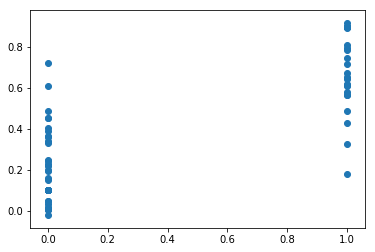

In [96]:
plt.scatter(y_test, svr.predict(X_test));

Let's score it with the complete dataset: X, and Y

In [95]:
svr.fit(X_test, y_test) 
svr.score(X_test, y_test)

/Users/lou/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9478002516196535